In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import ttest_ind, chi2_contingency
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler

In [2]:
import sys
sys.path.append('../src')
from functions import *

# Loading the Data

In [3]:
df_test_final = pd.read_csv('../Data/Cleaned_Data/df_test_final.csv')
df_control_final = pd.read_csv('../Data/Cleaned_Data/df_control_final.csv')
pd.set_option('display.max_columns', None)

# df_control

## Check the data types

In [4]:
df_control_final.dtypes

client_id                      int64
visit_visitor_id              object
start_time                   float64
step_1                       float64
step_2                       float64
step_3                       float64
time_completion              float64
navigations_bt_start_last    float64
completion                     int64
start_step                   float64
1st_step                     float64
2nd_step                     float64
3rd_step                     float64
last_step                     object
variation                     object
clnt_tenure_yr                 int64
clnt_tenure_mnth               int64
clnt_age                       int64
gendr                         object
num_accts                      int64
bal                          float64
calls_6_mnth                 float64
logons_6_mnth                float64
date                          object
initial_date                  object
total_time_visit             float64
final_date                    object
d

## Categorical columns

In [5]:
df_control_final

,client_id,visit_visitor_id,start_time,step_1,step_2,step_3,time_completion,navigations_bt_start_last,completion,start_step,1st_step,2nd_step,3rd_step,last_step,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,date,initial_date,total_time_visit,final_date
0,1186,507052512_11309370126_442139_446844663_3161510...,0.000000,0.000000,0.000000,0.000000,0.0,1.098612,0,0.693147,0.000000,0.000000,0.000000,start,Control,8,99,22,Other,2,10.362921,0.000000,1.386294,2017-04-08,2017-04-08 15:59:16,0.000000,2017-04-08 15:59:16
1,1186,795373564_99931517312_810896_446844663_3161510...,0.168335,0.168335,0.000000,0.000000,0.0,1.609438,0,0.693147,0.693147,0.693147,0.000000,step_2,Control,8,99,22,Other,2,10.362921,0.000000,1.386294,2017-04-08,2017-04-08 18:05:02,0.312375,2017-04-08 18:05:24
2,2581,182925466_27021409208_83502_770616558_80928163524,0.000000,0.000000,0.000000,0.000000,0.0,1.098612,0,0.693147,0.000000,0.000000,0.000000,start,Control,4,58,22,M,2,10.125742,0.693147,1.609438,2017-04-09,2017-04-09 06:11:41,0.000000,2017-04-09 06:11:41
3,3647,492965200_82386590930_211259_742136411_9217069...,0.000000,0.000000,0.000000,0.000000,0.0,1.098612,0,0.693147,0.000000,0.000000,0.000000,start,Control,15,190,63,F,2,11.946298,1.609438,2.079442,2017-04-10,2017-04-10 12:28:09,0.000000,2017-04-10 12:28:09
4,5354,192604721_14077630095_819213_233679354_3649539...,0.196115,0.125163,0.249461,0.624154,0.0,1.791759,1,0.693147,0.693147,0.693147,0.693147,confirm,Control,4,58,50,Other,2,11.039450,1.098612,1.791759,2017-04-12,2017-04-12 20:30:01,0.916291,2017-04-12 20:31:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9995400,389786137_84234335099_924161_53898813_12901962766,0.196115,0.312375,1.218861,1.011601,0.0,1.791759,1,0.693147,0.693147,0.693147,0.693147,confirm,Control,10,120,49,M,2,10.480691,0.000000,1.386294,2017-04-12,2017-04-12 20:17:29,1.743386,2017-04-12 20:22:12
9998,9997125,983995660_11938398128_321832_435478449_4197437...,0.154151,0.382992,0.650588,0.882389,0.0,1.791759,1,0.693147,0.693147,0.693147,0.693147,confirm,Control,5,70,57,Other,2,10.549341,0.000000,1.386294,2017-04-16,2017-04-16 08:39:35,1.377926,2017-04-16 08:42:33
9999,9997470,655572400_94971272893_411965_91394485_75296404278,0.000000,0.000000,0.000000,0.000000,0.0,1.098612,0,0.693147,0.000000,0.000000,0.000000,start,Control,6,82,36,Other,2,10.888260,0.000000,1.386294,2017-04-07,2017-04-07 16:11:03,0.000000,2017-04-07 16:11:03
10000,9997470,904791598_9725982898_416914_395791369_55562604618,0.000000,0.000000,0.000000,0.000000,0.0,1.098612,0,0.693147,0.000000,0.000000,0.000000,start,Control,6,82,36,Other,2,10.888260,0.000000,1.386294,2017-04-20,2017-04-20 20:04:38,0.000000,2017-04-20 20:04:38


In [6]:
# Extracting column names with numerical data types from the dataframe
df_control_final.select_dtypes("object").columns


Index(['visit_visitor_id', 'last_step', 'variation', 'gendr', 'date',
       'initial_date', 'final_date'],
      dtype='object')

In [7]:
test_categorical_columns = ['last_step', 'gendr',]

In [8]:
# Extracting column names with numerical data types from the dataframe
df_control_final.select_dtypes("object").nunique().sort_values(ascending=False)

visit_visitor_id    9988
initial_date        9950
final_date          9946
date                  91
last_step              5
gendr                  3
variation              1
dtype: int64

In [9]:
frequency_proportion(df_control_final, 'last_step')

Frequency:last_step
confirm    4472
start      3106
step_1     1154
step_3      676
step_2      594
Name: count, dtype: int64
Proportion: last_step
confirm    0.447111
start      0.310538
step_1     0.115377
step_3     0.067586
step_2     0.059388
Name: proportion, dtype: float64


In [10]:
frequency_proportion(df_control_final, 'gendr')

Frequency:gendr
Other    3911
F        3219
M        2872
Name: count, dtype: int64
Proportion: gendr
Other    0.391022
F        0.321836
M        0.287143
Name: proportion, dtype: float64


In [11]:
cross_table(df_control_final, 'start_time')

,start_time,count
0,0.000000,3108
1,0.032790,8
2,0.048790,113
3,0.064539,280
4,0.080043,334
...,...,...
62,0.717840,13
63,0.725937,13
64,0.733969,18
65,0.741937,12


In [12]:
frequency_proportion(df_control_final, 'start_time')

Frequency:start_time
0.000000    3108
0.139762     370
0.154151     353
0.125163     347
0.095310     341
            ... 
0.741937      12
0.749843      12
0.684779      10
0.676340      10
0.032790       8
Name: count, Length: 67, dtype: int64
Proportion: start_time
0.000000    0.310738
0.139762    0.036993
0.154151    0.035293
0.125163    0.034693
0.095310    0.034093
              ...   
0.741937    0.001200
0.749843    0.001200
0.684779    0.001000
0.676340    0.001000
0.032790    0.000800
Name: proportion, Length: 67, dtype: float64


In [13]:
tab_control_last_step = cross_table(df_control_final, 'last_step')
tab_control_last_step

,last_step,count
0,confirm,4472
1,start,3106
2,step_1,1154
3,step_2,594
4,step_3,676


In [14]:
df_control_final['last_step'].value_counts()

last_step
confirm    4472
start      3106
step_1     1154
step_3      676
step_2      594
Name: count, dtype: int64

In [15]:
# Calculating the proportions for each value in 'tab_test_last_step' and rounding the results to two decimal places
(tab_control_last_step['count'] / tab_control_last_step['count'].sum()).round(2)

0    0.45
1    0.31
2    0.12
3    0.06
4    0.07
Name: count, dtype: float64

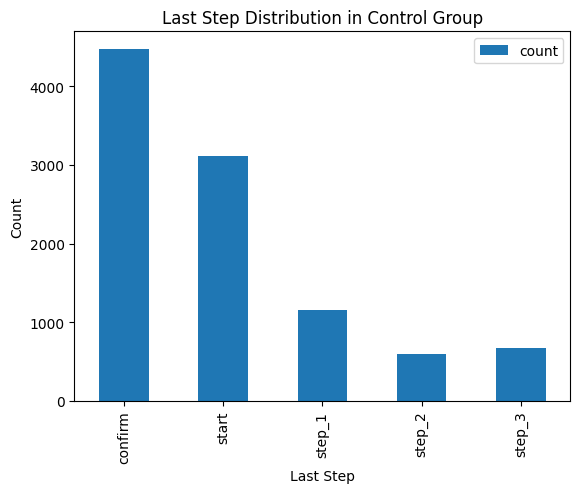

In [16]:
tab_control_last_step.plot(x='last_step', y='count', kind='bar')
plt.xlabel('Last Step')
plt.ylabel('Count')
plt.title('Last Step Distribution in Control Group')
plt.show()

In [17]:
tab_control_gender = cross_table(df_control_final, 'gendr')
tab_control_gender

,gendr,count
0,F,3219
1,M,2872
2,Other,3911


In [18]:
# Calculating the proportions for each value in 'tab_test_last_step' and rounding the results to two decimal places
(tab_control_gender['count'] / tab_control_gender['count'].sum()).round(2)

0    0.32
1    0.29
2    0.39
Name: count, dtype: float64

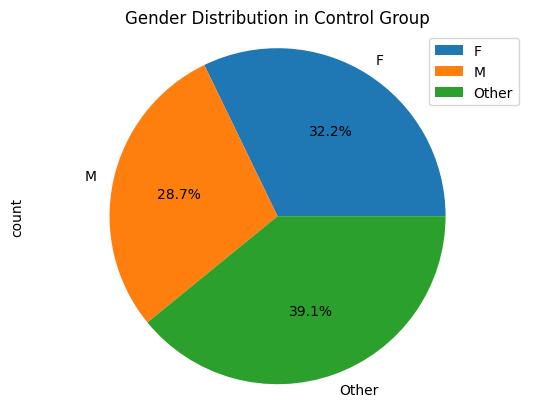

In [19]:
tab_control_gender.plot.pie(y='count', labels=tab_control_gender['gendr'], autopct='%1.1f%%')
plt.title('Gender Distribution in Control Group')
plt.axis('equal')
plt.show()

## Numerical columns

## Check the data types

### Centrality and Dispersion Measures

In [20]:
# Extracting column names with numerical data types from the dataframe
control_numerical_columns = df_control_final.select_dtypes("number").columns
print(control_numerical_columns)
print(df_control_final.dtypes)

Index(['client_id', 'start_time', 'step_1', 'step_2', 'step_3',
       'time_completion', 'navigations_bt_start_last', 'completion',
       'start_step', '1st_step', '2nd_step', '3rd_step', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth',
       'logons_6_mnth', 'total_time_visit'],
      dtype='object')
client_id                      int64
visit_visitor_id              object
start_time                   float64
step_1                       float64
step_2                       float64
step_3                       float64
time_completion              float64
navigations_bt_start_last    float64
completion                     int64
start_step                   float64
1st_step                     float64
2nd_step                     float64
3rd_step                     float64
last_step                     object
variation                     object
clnt_tenure_yr                 int64
clnt_tenure_mnth               int64
clnt_age             

In [21]:
control_numerical_columns = ['start_time', 'step_1', 'step_2', 'step_3', 'time_completion',
       'navigations_bt_start_last', 'start_step', '1st_step', '2nd_step',
       '3rd_step', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth',
       'total_time_visit']
print(control_numerical_columns)

['start_time', 'step_1', 'step_2', 'step_3', 'time_completion', 'navigations_bt_start_last', 'start_step', '1st_step', '2nd_step', '3rd_step', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'total_time_visit']


In [22]:
# Extracting column names with numerical data types from the dataframe
df_control_final.select_dtypes("number").nunique().sort_values(ascending=False)

client_id                    8815
bal                          8801
total_time_visit              398
clnt_tenure_mnth              302
step_2                        241
step_3                        191
clnt_age                       76
step_1                         68
start_time                     67
clnt_tenure_yr                 27
logons_6_mnth                   7
navigations_bt_start_last       7
calls_6_mnth                    7
3rd_step                        3
1st_step                        3
completion                      3
2nd_step                        3
num_accts                       1
start_step                      1
time_completion                 1
dtype: int64

In [23]:
df_control_final.describe()

,client_id,start_time,step_1,step_2,step_3,time_completion,navigations_bt_start_last,completion,start_step,1st_step,2nd_step,3rd_step,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth,total_time_visit
count,1.000200e+04,10002.000000,10002.000000,10002.000000,10002.000000,10002.0,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.000000,10002.0,10002.000000,10002.000000,10002.000000,10002.000000
mean,4.987912e+06,0.177451,0.151593,0.423850,0.329034,0.0,1.535856,0.447211,0.693147,0.486765,0.421215,0.371844,10.714757,134.679464,45.088082,2.0,10.931348,1.162296,1.884160,0.756007
std,2.887785e+06,0.181276,0.184885,0.461531,0.409791,0.0,0.327972,0.497833,0.000000,0.331866,0.369957,0.367102,5.591779,66.595626,15.416289,0.0,0.565905,0.678124,0.325679,0.661741
min,1.186000e+03,0.000000,0.000000,0.000000,0.000000,0.0,1.098612,0.000000,0.693147,0.000000,0.000000,0.000000,2.000000,34.000000,17.000000,2.0,10.077046,0.000000,1.386294,0.000000
25%,2.473820e+06,0.000000,0.000000,0.000000,0.000000,0.0,1.098612,0.000000,0.693147,0.000000,0.000000,0.000000,6.000000,76.000000,32.000000,2.0,10.454853,0.693147,1.609438,0.000000
50%,5.011826e+06,0.139762,0.095310,0.312375,0.000000,0.0,1.791759,0.000000,0.693147,0.693147,0.693147,0.693147,9.000000,119.000000,44.000000,2.0,10.836036,1.386294,1.945910,0.818310
75%,7.472021e+06,0.275103,0.236389,0.818310,0.650588,0.0,1.791759,1.000000,0.693147,0.693147,0.693147,0.693147,14.000000,179.000000,58.000000,2.0,11.311250,1.791759,2.197225,1.356694
max,9.998921e+06,0.749843,0.684779,1.529673,1.373716,0.0,2.197225,3.000000,0.693147,1.098612,1.098612,1.098612,28.000000,336.000000,93.000000,2.0,12.303464,1.945910,2.302585,2.124256


In [24]:
# Filtering the numerical columns for analysis
df_numerical_control = pd.DataFrame(df_control_final[control_numerical_columns])

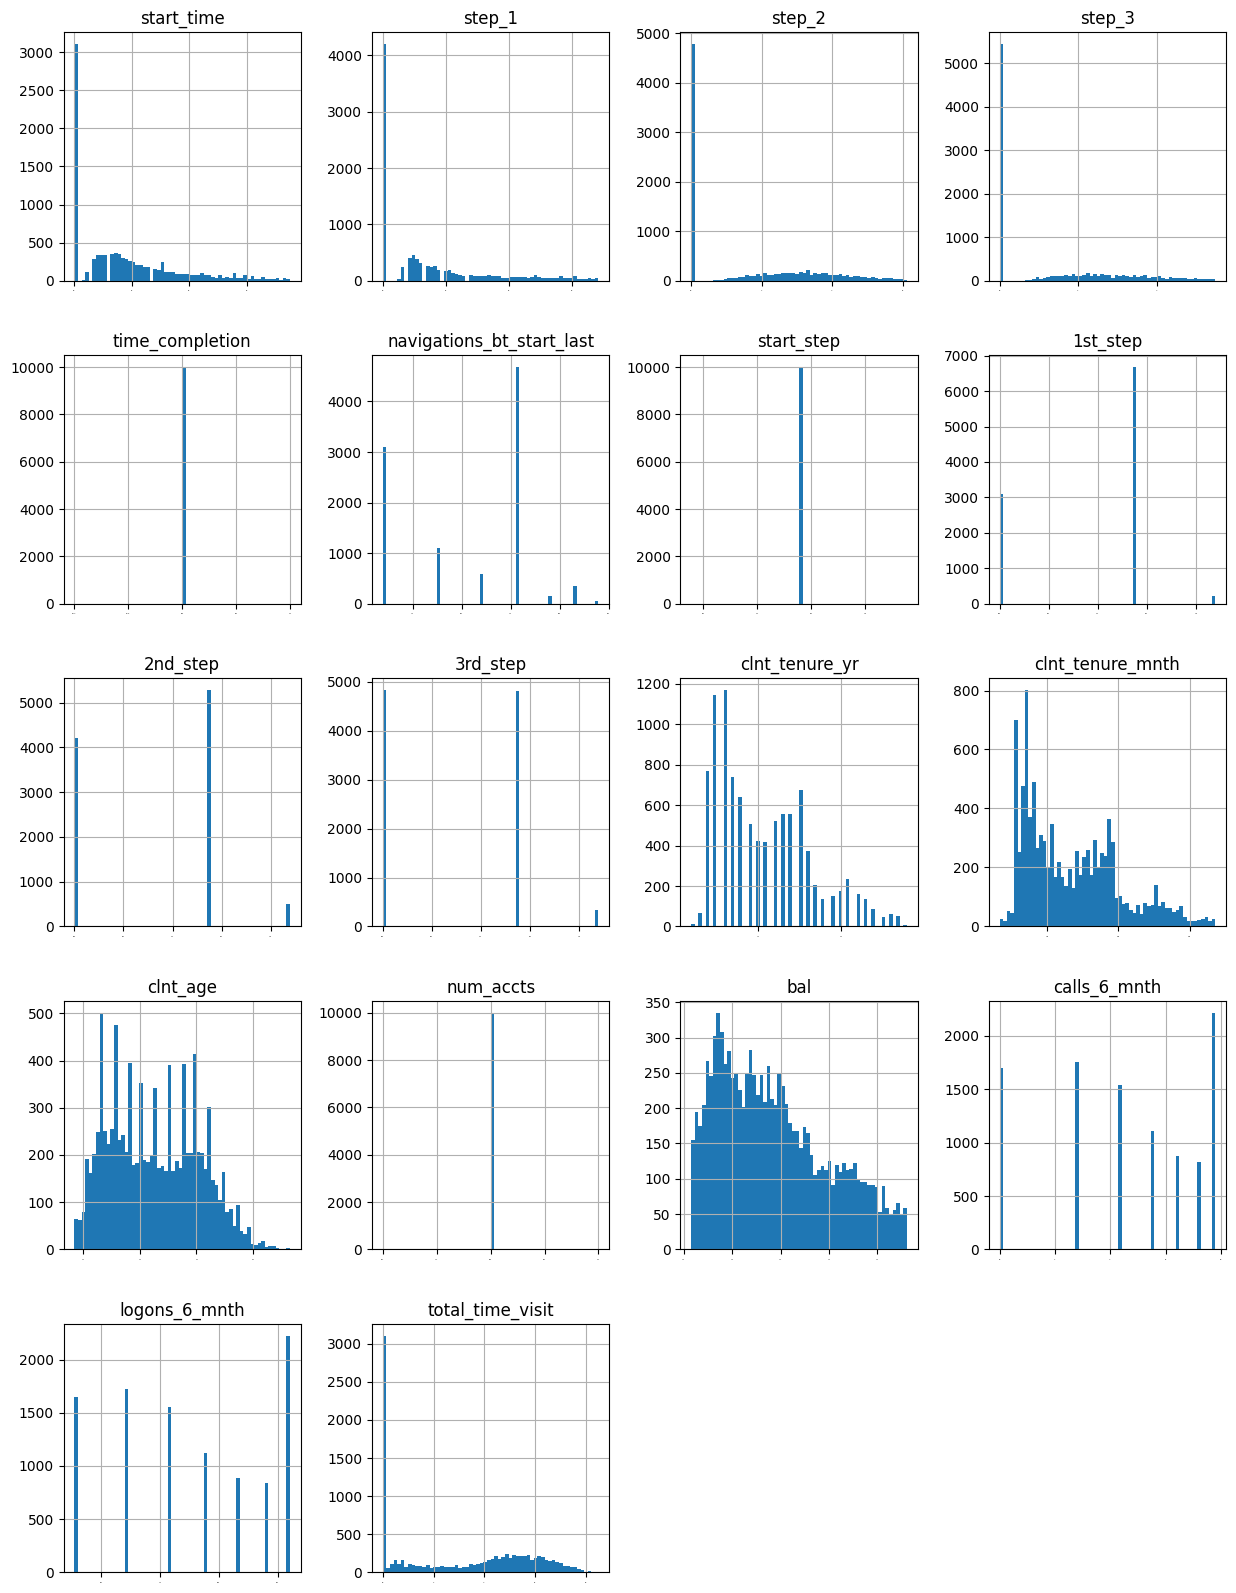

In [25]:
# Plotting histograms for the numerical columns before removing outliers
df_numerical_control.hist(figsize=(15, 20), bins=60, xlabelsize=1, ylabelsize=10);

In [26]:
# Applying IQR method to each specified column
for column in control_numerical_columns:
    df_control_final = remove_outliers_iqr(df_control_final, column)
    df_numerical_control = pd.DataFrame(df_control_final[control_numerical_columns])

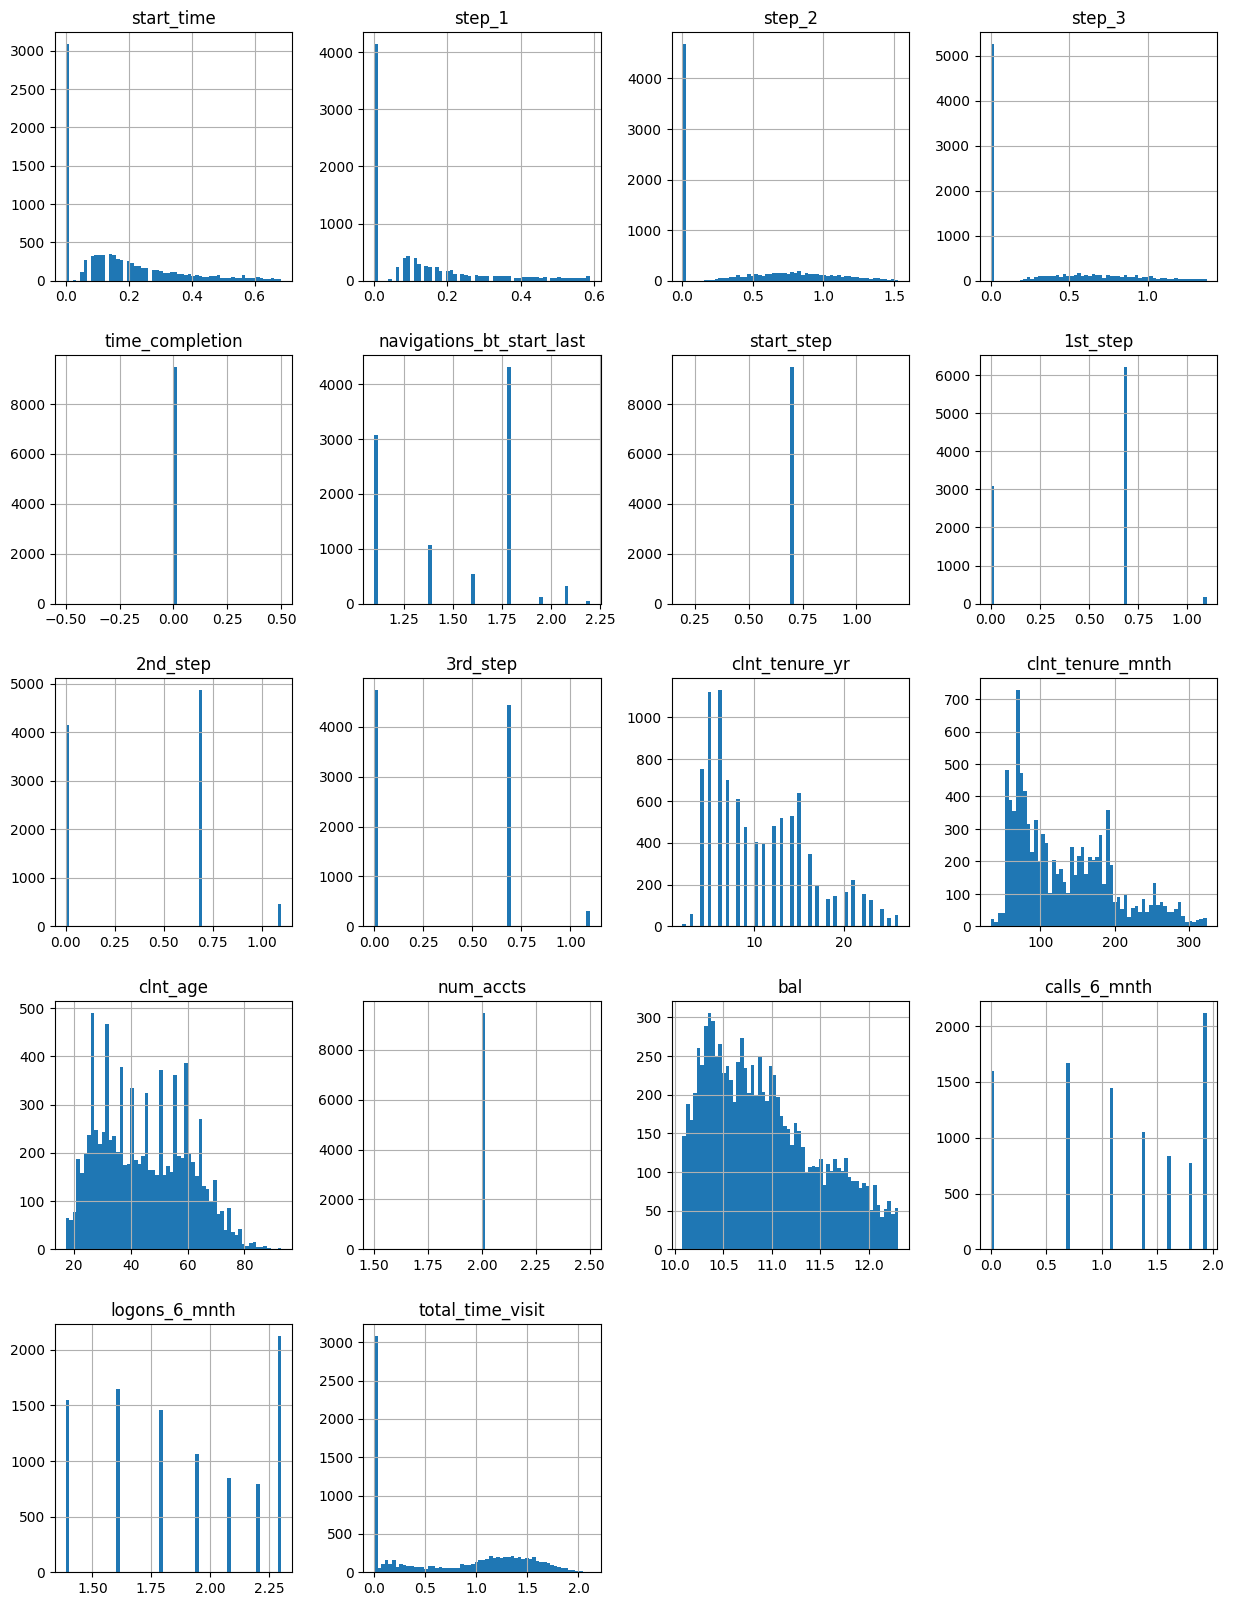

In [27]:
# Plotting histograms for the numerical columns after removing outliers
df_numerical_control.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

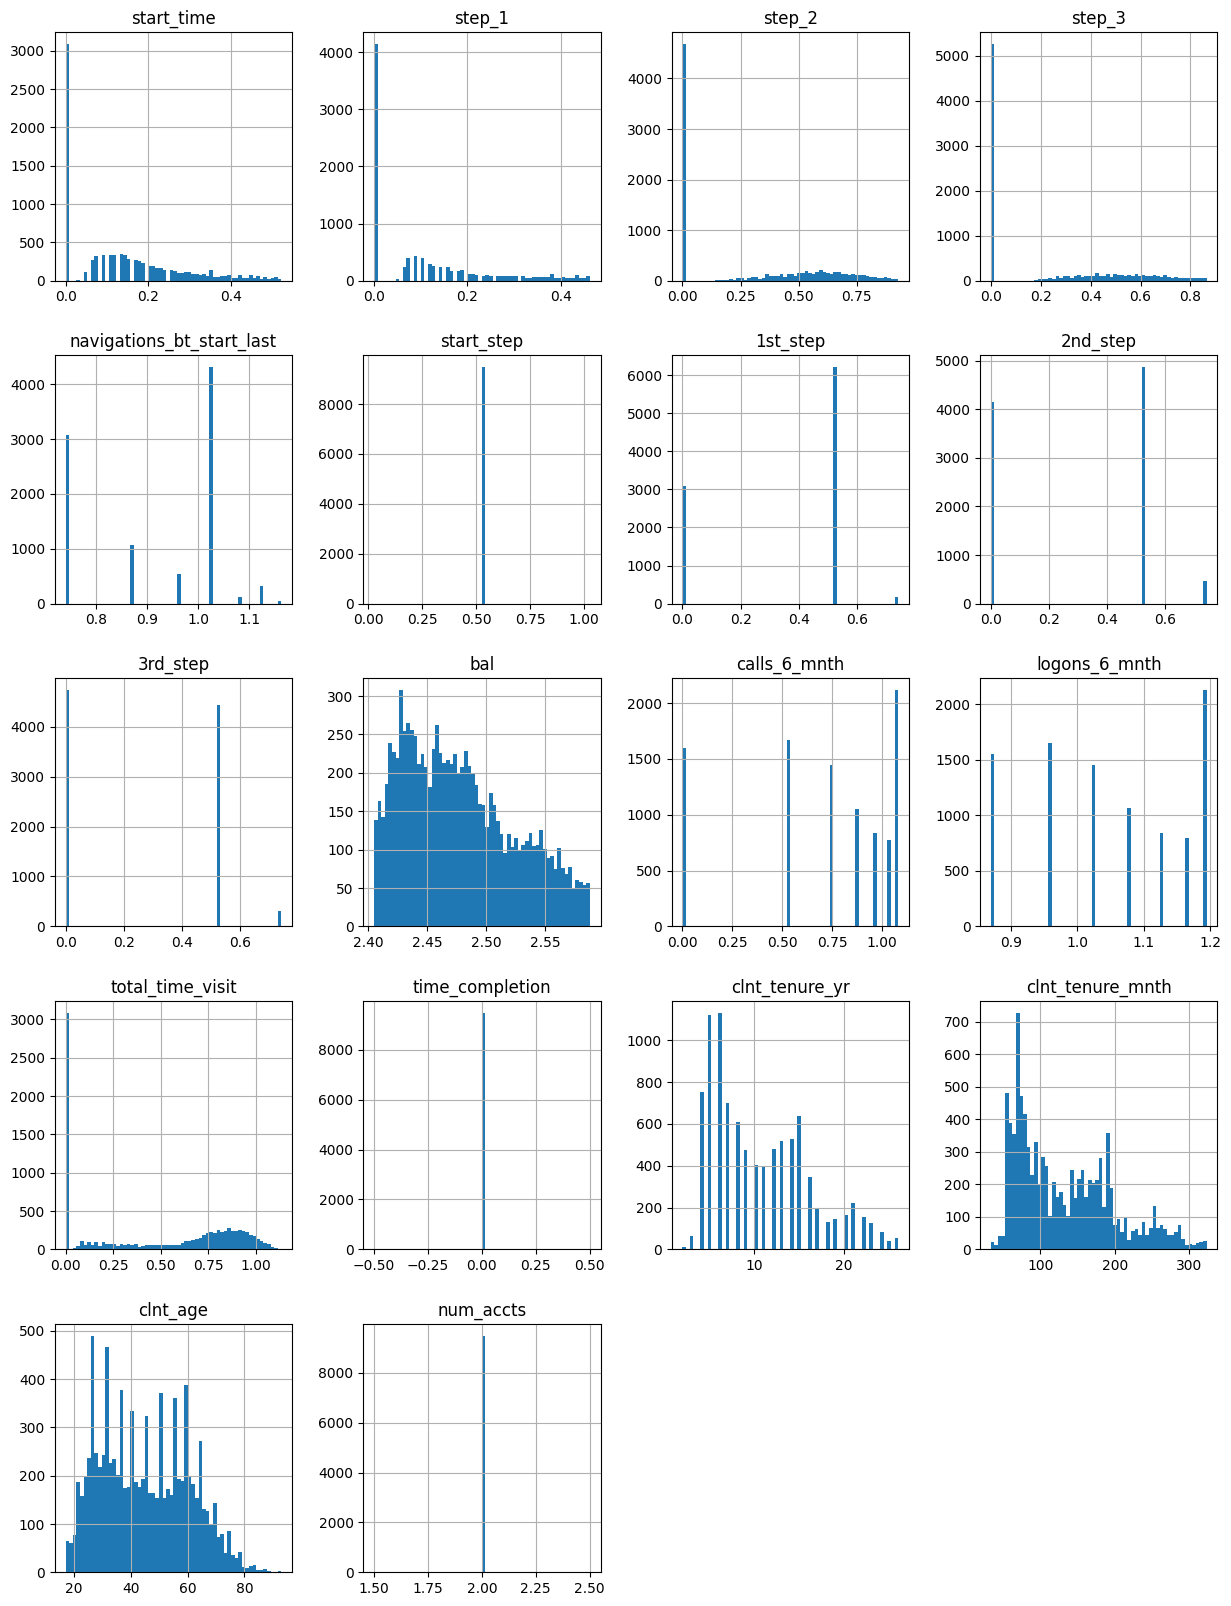

In [28]:
# List of columns to apply log transformation
log_transform_columns = [
    'start_time', 'step_1', 'step_2', 'step_3', 'navigations_bt_start_last',
    'start_step', '1st_step', '2nd_step', '3rd_step', 'bal',
    'calls_6_mnth', 'logons_6_mnth', 'total_time_visit'
]
# Applying log transformation
for column in log_transform_columns:
    df_control_final[column] = np.log1p(df_control_final[column])

# Reapplying IQR method to each specified column after log transformation
control_numerical_columns = log_transform_columns + [
    'time_completion', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts'
]
for column in control_numerical_columns:
    df_control_final = remove_outliers_iqr(df_control_final, column)
# Filtering the numerical columns for analysis
df_numerical_control = pd.DataFrame(df_control_final[control_numerical_columns]) 

# Plotting histograms for the numerical columns after removing outliers
df_numerical_control.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);


In [29]:
df_control_final.to_csv('../Data/Cleaned_Data/df_control_final.csv', index=False)  

# df_test

## Check the data types

## Univariate Analysis - df_test

In [30]:
df_test_final = convert_data_types_final(df_test_final)


## Categorical columns

In [31]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("object").columns


Index(['client_id', 'visit_visitor_id', 'last_step', 'variation', 'gendr'], dtype='object')

In [32]:
test_categorical_columns = ['last_step', 'gendr']

In [33]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("object").nunique().sort_values(ascending=False)

visit_visitor_id    5868
client_id           5804
last_step              3
gendr                  3
variation              1
dtype: int64

In [34]:
frequency_proportion(df_test_final, 'last_step')

Frequency:last_step
confirm    5336
step_3      541
start         1
Name: count, dtype: int64
Proportion: last_step
confirm    0.907792
step_3     0.092038
start      0.000170
Name: proportion, dtype: float64


In [35]:
frequency_proportion(df_test_final, 'gendr')

Frequency:gendr
Other    2297
F        1878
M        1703
Name: count, dtype: int64
Proportion: gendr
Other    0.390779
F        0.319496
M        0.289724
Name: proportion, dtype: float64


In [36]:
cross_table(df_test_final, 'start_time')

,start_time,count
0,0.00,1
1,0.03,45
2,0.05,286
3,0.07,496
4,0.08,513
...,...,...
114,1.93,1
115,1.95,1
116,1.97,4
117,1.98,4


In [37]:
frequency_proportion(df_test_final, 'start_time')

Frequency:start_time
0.08    513
0.10    502
0.07    496
0.12    486
0.15    439
       ... 
2.00      1
1.73      1
1.93      1
1.95      1
1.80      1
Name: count, Length: 119, dtype: int64
Proportion: start_time
0.08    0.087275
0.10    0.085403
0.07    0.084382
0.12    0.082681
0.15    0.074685
          ...   
2.00    0.000170
1.73    0.000170
1.93    0.000170
1.95    0.000170
1.80    0.000170
Name: proportion, Length: 119, dtype: float64


In [38]:
tab_test_last_step = cross_table(df_test_final, 'last_step')
tab_test_last_step

,last_step,count
0,confirm,5336
1,start,1
2,step_3,541


In [39]:
# Calculating the proportions for each value in 'tab_test_last_step' and rounding the results to two decimal places
(tab_test_last_step['count'] / tab_test_last_step['count'].sum()).round(2)

0    0.91
1    0.00
2    0.09
Name: count, dtype: float64

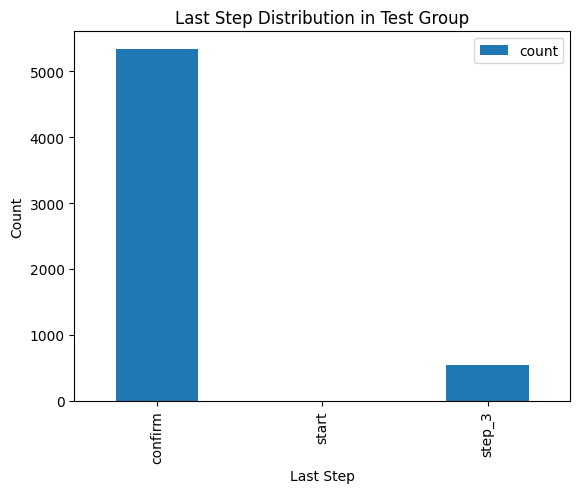

In [40]:
tab_test_last_step.plot(x='last_step', y='count', kind='bar')
plt.xlabel('Last Step')
plt.ylabel('Count')
plt.title('Last Step Distribution in Test Group')
plt.show()

In [41]:

tab_test_gender = cross_table(df_test_final, 'gendr')
tab_test_gender


,gendr,count
0,F,1878
1,M,1703
2,Other,2297


In [42]:
# Calculating the proportions for each value in 'tab_test_last_step' and rounding the results to two decimal places
(tab_test_gender['count'] / tab_test_gender['count'].sum()).round(2)

0    0.32
1    0.29
2    0.39
Name: count, dtype: float64

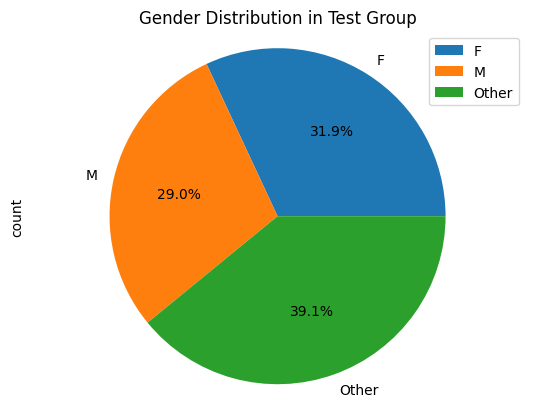

In [43]:
tab_test_gender.plot.pie(y='count', labels=tab_test_gender['gendr'], autopct='%1.1f%%')
plt.title('Gender Distribution in Test Group')
plt.axis('equal')
plt.show()

## Numerical columns

### Centrality and Dispersion Measures

In [44]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("number").columns

Index(['start_time', 'step_1', 'step_2', 'step_3', 'time_completion',
       'navigations_bt_start_last', 'start_step', '1st_step', '2nd_step',
       '3rd_step', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth',
       'total_time_visit'],
      dtype='object')

In [45]:
df_test_final.dtypes

client_id                            object
visit_visitor_id                     object
start_time                          float64
step_1                              float64
step_2                              float64
step_3                              float64
time_completion                     float64
navigations_bt_start_last             int64
completion                             bool
start_step                            int64
1st_step                              int64
2nd_step                              int64
3rd_step                              int64
last_step                            object
variation                            object
clnt_tenure_yr                        int64
clnt_tenure_mnth                      int64
clnt_age                              int64
gendr                                object
num_accts                             int64
bal                                 float64
calls_6_mnth                          int64
logons_6_mnth                   

In [46]:

test_numerical_columns = ['start_time', 'step_1', 'step_2', 'step_3', 'time_completion',
       'navigations_bt_start_last', 'start_step', '1st_step', '2nd_step',
       '3rd_step', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth',
       'total_time_visit']

In [47]:
test_numerical_columns

['start_time',
 'step_1',
 'step_2',
 'step_3',
 'time_completion',
 'navigations_bt_start_last',
 'start_step',
 '1st_step',
 '2nd_step',
 '3rd_step',
 'clnt_tenure_yr',
 'clnt_tenure_mnth',
 'clnt_age',
 'num_accts',
 'bal',
 'calls_6_mnth',
 'logons_6_mnth',
 'total_time_visit']

In [48]:
# Extracting column names with numerical data types from the dataframe
df_test_final.select_dtypes("number").nunique().sort_values(ascending=False)


clnt_tenure_mnth             309
bal                          212
total_time_visit             141
step_2                       128
start_time                   119
step_3                        96
step_1                        90
clnt_age                      74
clnt_tenure_yr                27
calls_6_mnth                   7
logons_6_mnth                  7
navigations_bt_start_last      1
start_step                     1
1st_step                       1
2nd_step                       1
time_completion                1
num_accts                      1
3rd_step                       1
dtype: int64

In [49]:
df_test_final.describe()

,start_time,step_1,step_2,step_3,time_completion,navigations_bt_start_last,start_step,1st_step,2nd_step,3rd_step,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth,date,initial_date,total_time_visit,final_date
count,5878.000000,5878.000000,5878.000000,5878.000000,5878.0,5878.0,5878.0,5878.0,5878.0,5878.0,5878.000000,5878.000000,5878.000000,5878.0,5878.000000,5878.000000,5878.000000,5878,5878,5878.000000,5878
mean,0.240624,0.342252,0.760812,0.499588,0.0,5.0,1.0,1.0,1.0,1.0,10.671997,134.159578,42.871895,2.0,10.873853,2.678462,5.703981,2017-04-18 01:11:46.771010560,2017-04-18 15:23:28.579618816,1.247506,2017-04-18 15:26:05.870364160
min,0.000000,0.030000,0.140000,0.000000,0.0,5.0,1.0,1.0,1.0,1.0,2.000000,33.000000,17.000000,2.0,10.080000,0.000000,3.000000,2017-03-15 00:00:00,2017-03-15 11:04:50,0.360000,2017-03-15 11:06:18
25%,0.100000,0.200000,0.560000,0.310000,0.0,5.0,1.0,1.0,1.0,1.0,6.000000,76.000000,30.000000,2.0,10.420000,1.000000,4.000000,2017-04-03 00:00:00,2017-04-03 00:25:39,1.040000,2017-04-03 00:30:02.750000128
50%,0.150000,0.300000,0.740000,0.460000,0.0,5.0,1.0,1.0,1.0,1.0,9.000000,119.000000,41.000000,2.0,10.780000,2.000000,5.000000,2017-04-12 00:00:00,2017-04-12 11:48:13,1.240000,2017-04-12 11:50:24
75%,0.230000,0.450000,0.950000,0.680000,0.0,5.0,1.0,1.0,1.0,1.0,14.000000,179.000000,55.000000,2.0,11.250000,5.000000,8.000000,2017-04-23 00:00:00,2017-04-23 17:41:17.500000,1.460000,2017-04-23 17:44:12.750000128
max,2.000000,1.040000,1.490000,1.190000,0.0,5.0,1.0,1.0,1.0,1.0,28.000000,347.000000,92.000000,2.0,12.190000,6.000000,9.000000,2017-06-20 00:00:00,2017-06-20 22:29:18,1.880000,2017-06-20 22:32:06
std,0.295020,0.198573,0.280695,0.281546,0.0,0.0,0.0,0.0,0.0,0.0,5.613973,66.958535,14.746249,0.0,0.537291,2.140715,2.136045,NaN,NaN,0.281269,NaN


In [50]:
df_numerical_test = pd.DataFrame(df_test_final[test_numerical_columns]) 

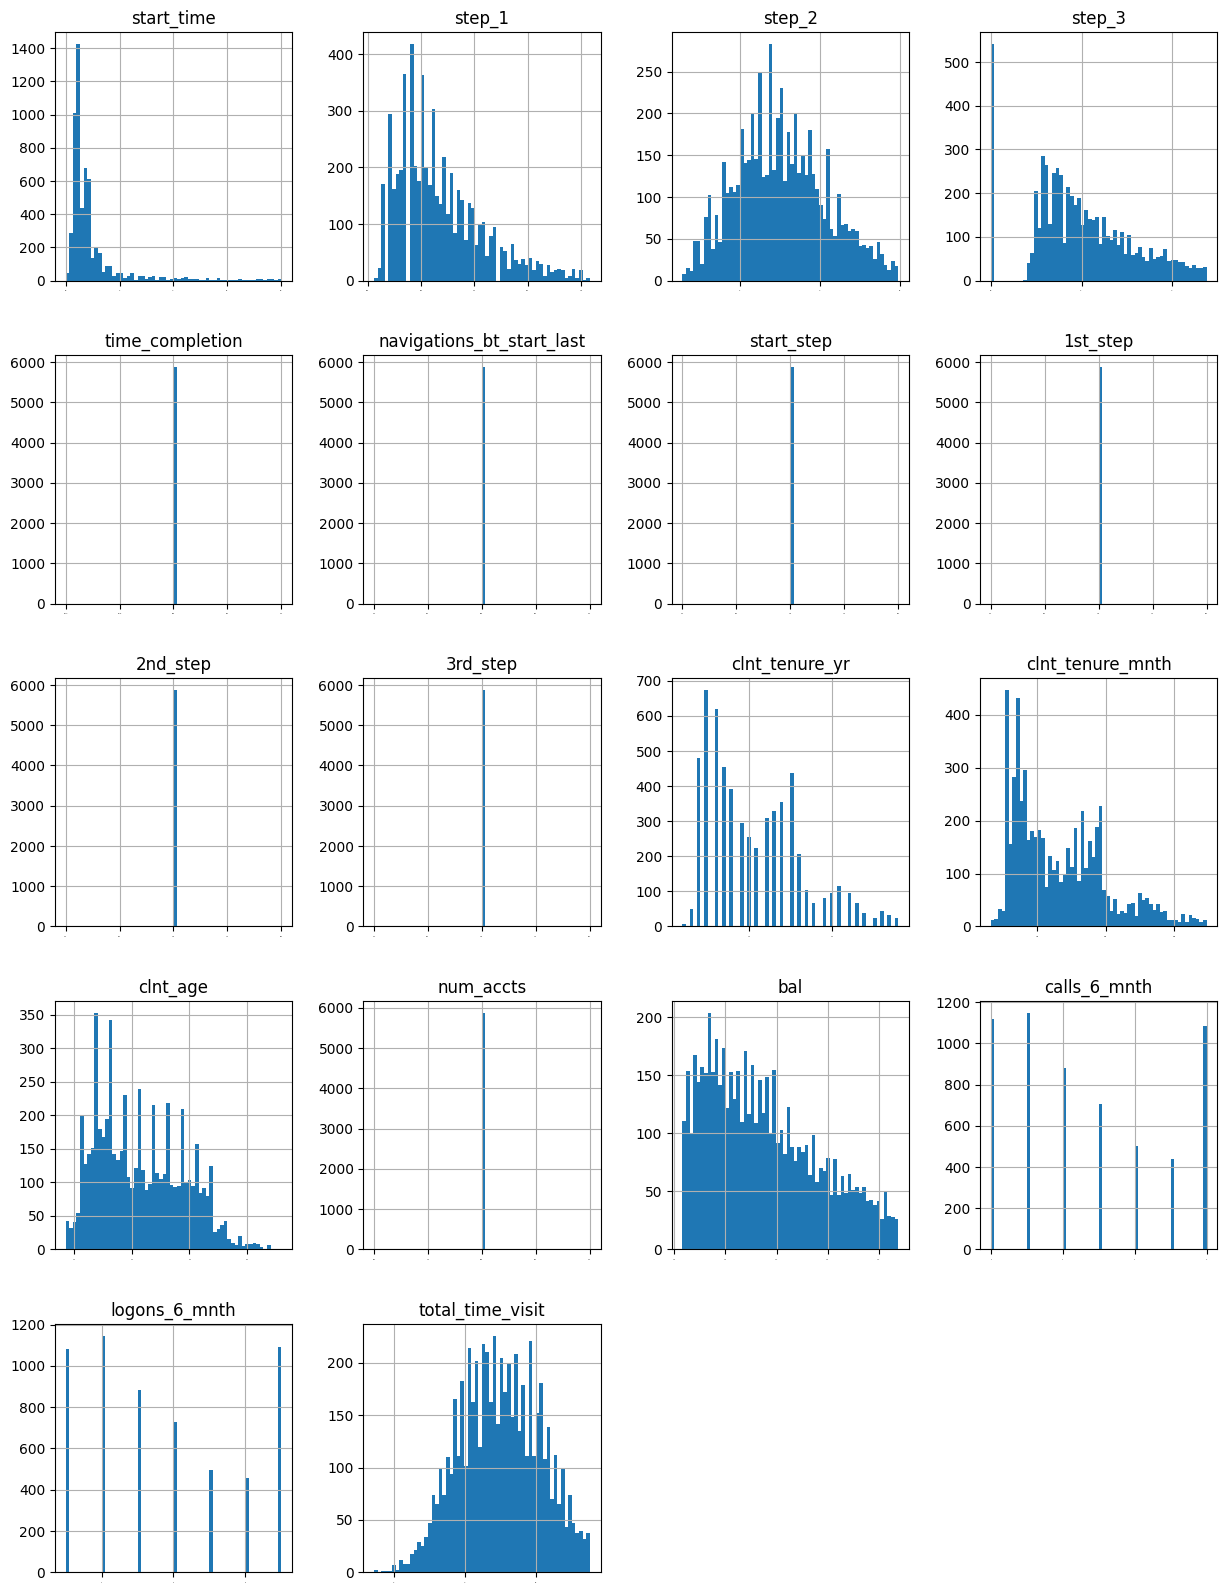

In [51]:
df_numerical_test.hist(figsize=(15, 20), bins=60, xlabelsize=1, ylabelsize=10);

In [52]:
for column in test_numerical_columns:
    df_test_final = remove_outliers_iqr(df_test_final, column)

    df_numerical_test = pd.DataFrame(df_test_final[test_numerical_columns]) 


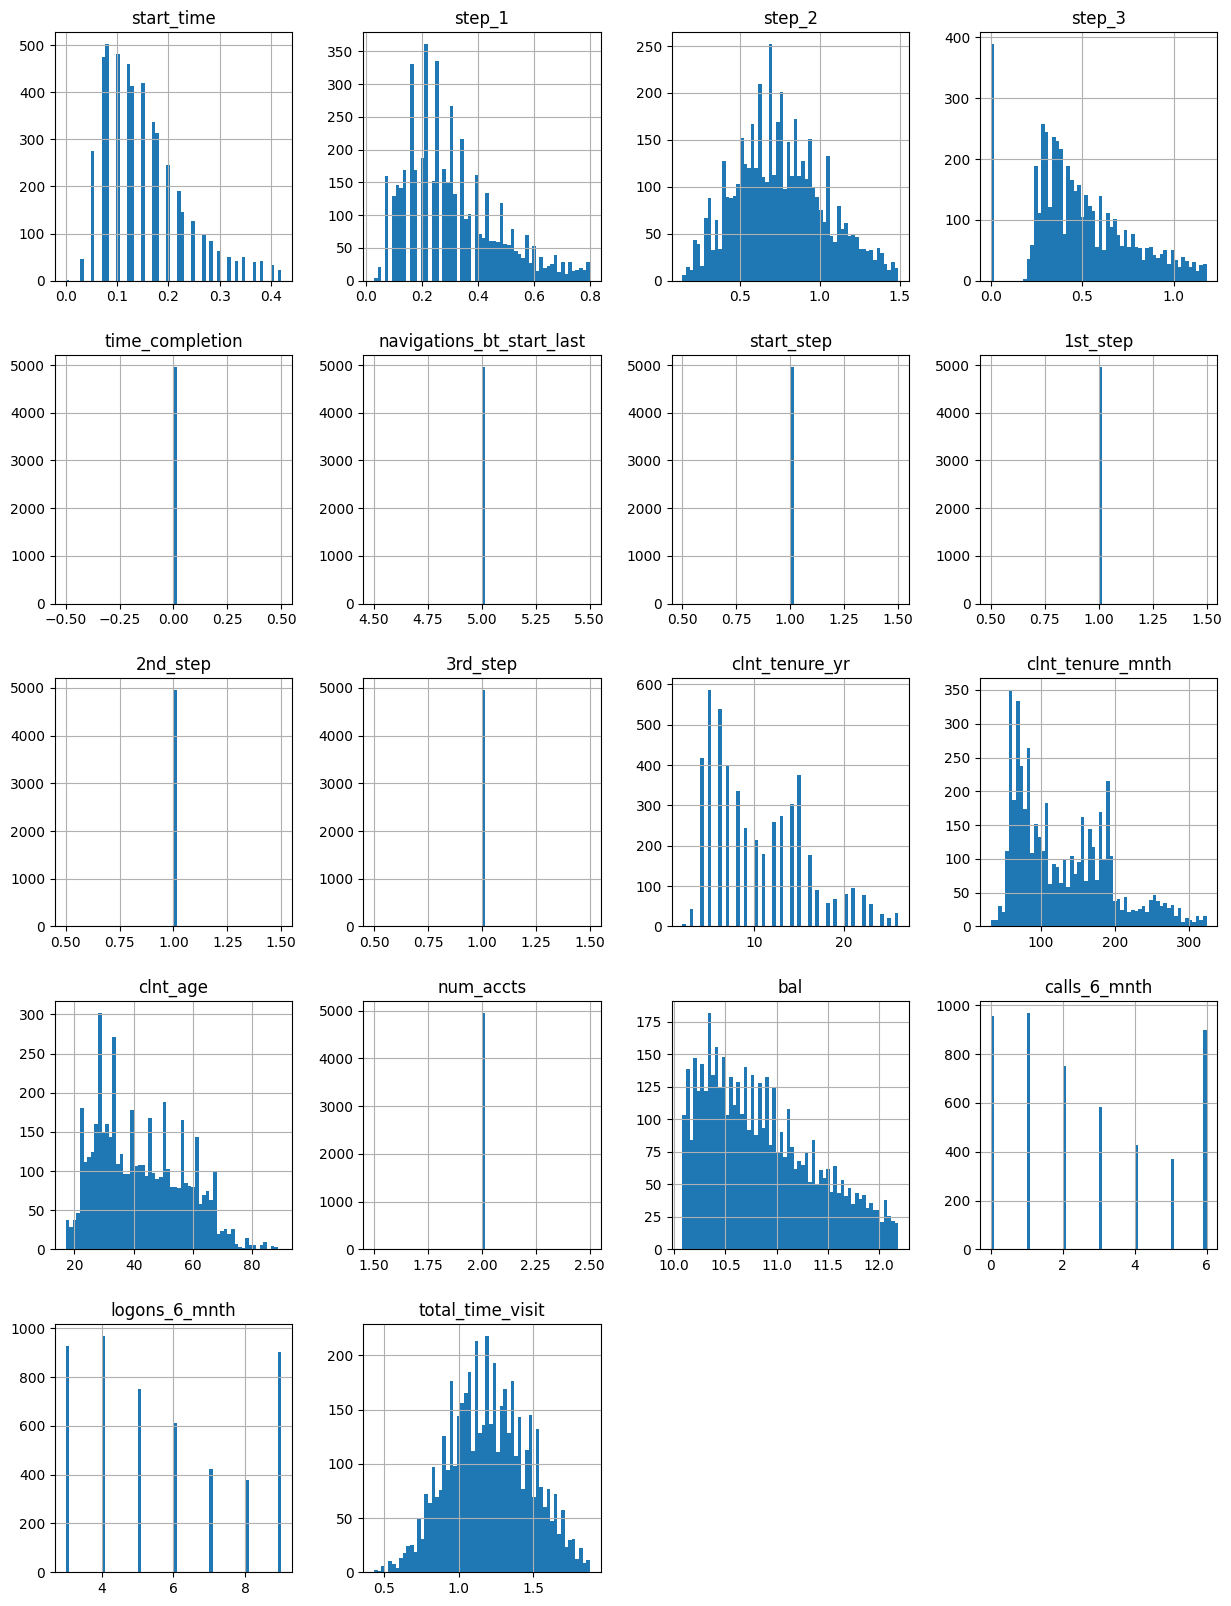

In [53]:
df_numerical_test.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

In [54]:
# List of columns to apply log transformation
log_transform_columns = ['step_1', 'step_2', 'step_3', 'bal', 'total_time_visit']

# Apply log transformation
for column in log_transform_columns:
    df_test_final[column] = np.log1p(df_test_final[column])

# Save the transformed DataFrame
df_test_final.to_csv('transformed_dataset.csv', index=False)


In [55]:
df_test_final = df_test_final.to_csv('../Data/Cleaned_Data/df_test_final.csv', index=False)